# Dump and reload example
This notebook illustrates how to dump a cancer simulation to disk, reload it, and continue with optionally changed parameters. This feature allows, e.g. simulating dormant tumours that only after a dormancy period start to grow fast.

## Import modules 

In [56]:
# The cancer simulation module.
from casim import casim

In [57]:
#  3rd party modules.
import os, shutil
from wand.image import Image as WImage
from glob import glob

In [58]:
import pickle
from matplotlib import pyplot

In [59]:
def unpickle(file):

    with open(os.path.join(cancer_sim._CancerSimulator__simdir, file),'rb') as fp:
        return pickle.load(fp)

## Setup parameters 
Initially, cells with advantageous mutations divide only seldomly, the tumour is dormant.

In [84]:
parameters=casim.CancerSimulatorParameters(
                                matrix_size=300,
                                number_of_generations=20,
                                division_probability=1.0,
                                adv_mutant_division_probability=0.1,
                                death_probability=0.1,
                                adv_mutant_death_probability=0.0,
                                mutation_probability=0.2,
                                adv_mutant_mutation_probability=0.3,
                                number_of_mutations_per_division=10,
                                adv_mutation_wait_time=3,
                                number_of_initial_mutations=2,
                                sampling_fraction=0.1,
                                plot_tumour_growth=True,
                                export_tumour=True
                               )

## Setup the simulation engine. 

In [85]:
if os.path.isdir('out'):
    shutil.rmtree('out')

In [86]:
cancer_sim = casim.CancerSimulator(parameters, seed=1, outdir='out/')

2020-08-14 08:50:43,783 INFO: Running in single tumour mode.
2020-08-14 08:50:43,785 INFO: First cell at (150, 150).


## Run the simulation 

In [87]:
cancer_sim.run()

2020-08-14 08:50:45,797 INFO: Ready to start CancerSim run with these parameters:
2020-08-14 08:50:45,799 INFO: matrix_size = 300
2020-08-14 08:50:45,801 INFO: number_of_generations = 20
2020-08-14 08:50:45,802 INFO: division_probability = 1.0
2020-08-14 08:50:45,804 INFO: adv_mutant_division_probability = 0.1
2020-08-14 08:50:45,805 INFO: death_probability = 0.1
2020-08-14 08:50:45,806 INFO: adv_mutant_death_probability = 0.0
2020-08-14 08:50:45,807 INFO: mutation_probability = 0.2
2020-08-14 08:50:45,809 INFO: adv_mutant_mutation_probability = 0.3
2020-08-14 08:50:45,810 INFO: number_of_mutations_per_division = 10
2020-08-14 08:50:45,811 INFO: adv_mutation_wait_time = 3
2020-08-14 08:50:45,812 INFO: number_of_initial_mutations = 2
2020-08-14 08:50:45,814 INFO: tumour_multiplicity = single
2020-08-14 08:50:45,815 INFO: read_depth = 100
2020-08-14 08:50:45,817 INFO: sampling_fraction = 0.1
2020-08-14 08:50:45,818 INFO: plot_tumour_growth = True
2020-08-14 08:50:45,820 INFO: export_tumo

0

## Visualize the first stage of the run

In [88]:
image_path=os.path.join(cancer_sim.outdir,'cancer_1', 'simOutput')

In [89]:
pdfs = glob(os.path.join(image_path,"*.pdf"))

out/cancer_1/simOutput/growthCurve.pdf


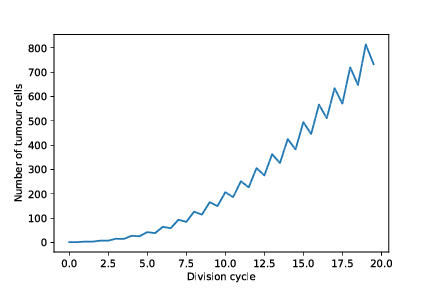

out/cancer_1/simOutput/wholeTumourVAFHistogram.pdf


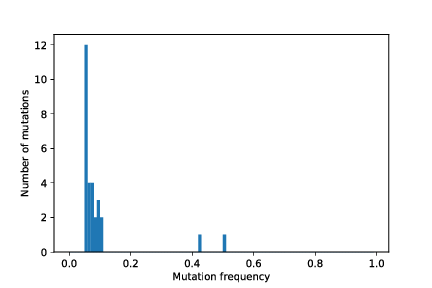

out/cancer_1/simOutput/sampleHistogram_158_156.pdf


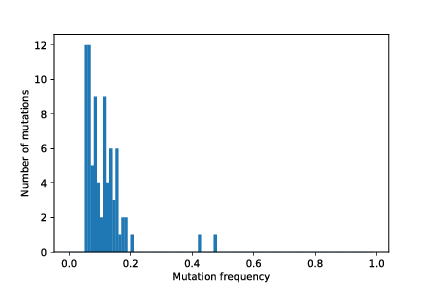

In [90]:
for pdf in pdfs:
    print(pdf)
    display(WImage(filename=pdf))

In [91]:
# Load the mutation matrix
mtx=unpickle('mtx.p').toarray()

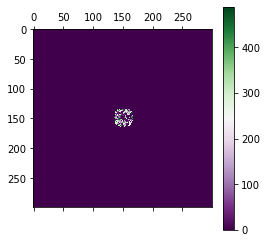

In [92]:
# Plot the tumour as a 2D map color coding the mutation ID
cmap = pyplot.cm.get_cmap('PRGn', mtx.max()+1)

pyplot.matshow(mtx, cmap=cmap)
pyplot.colorbar()

## Dump the simulation

In [93]:
cancer_sim.dump()

## Reload the simulation

In [94]:
cancer_sim = casim.load_cancer_simulation('out/cancer_1/cancer_sim.py.dill')

## Change adv. mutant properties and run for 20 more generations.

In [95]:
cancer_sim.parameters.adv_mutant_division_probability = 1.0
cancer_sim.parameters.adv_mutant_mutation_probability = 1.0
cancer_sim.parameters.number_of_generations = 20

In [96]:
cancer_sim.run()

2020-08-14 08:51:23,715 INFO: Ready to start CancerSim run with these parameters:
2020-08-14 08:51:23,719 INFO: matrix_size = 300
2020-08-14 08:51:23,720 INFO: number_of_generations = 20
2020-08-14 08:51:23,721 INFO: division_probability = 1.0
2020-08-14 08:51:23,723 INFO: adv_mutant_division_probability = 1.0
2020-08-14 08:51:23,724 INFO: death_probability = 0.1
2020-08-14 08:51:23,726 INFO: adv_mutant_death_probability = 0.0
2020-08-14 08:51:23,727 INFO: mutation_probability = 0.2
2020-08-14 08:51:23,728 INFO: adv_mutant_mutation_probability = 1.0
2020-08-14 08:51:23,730 INFO: number_of_mutations_per_division = 10
2020-08-14 08:51:23,731 INFO: adv_mutation_wait_time = 3
2020-08-14 08:51:23,732 INFO: number_of_initial_mutations = 2
2020-08-14 08:51:23,736 INFO: tumour_multiplicity = single
2020-08-14 08:51:23,737 INFO: read_depth = 100
2020-08-14 08:51:23,738 INFO: sampling_fraction = 0.1
2020-08-14 08:51:23,739 INFO: plot_tumour_growth = True
2020-08-14 08:51:23,740 INFO: export_tumo

0

## Output

out/cancer_1/simOutput/growthCurve.pdf


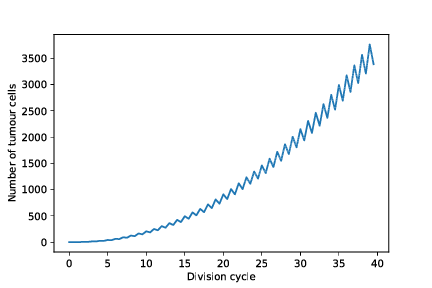

out/cancer_1/simOutput/wholeTumourVAFHistogram.pdf


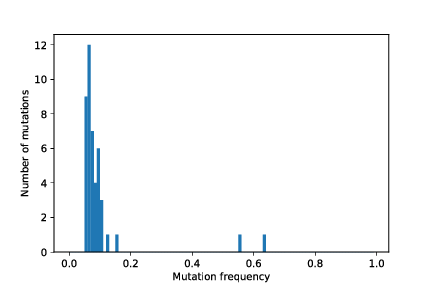

out/cancer_1/simOutput/sampleHistogram_158_156.pdf


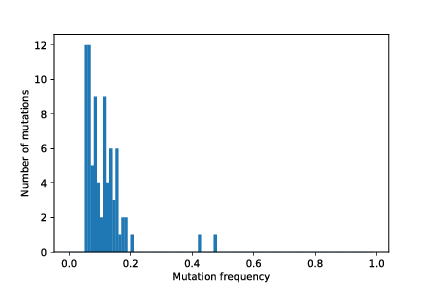

out/cancer_1/simOutput/sampleHistogram_142_127.pdf


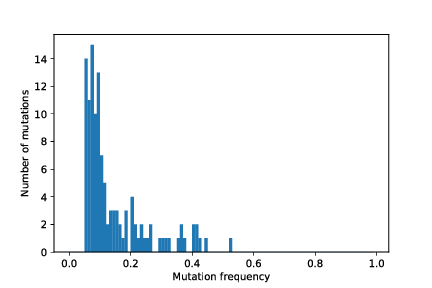

In [97]:
for pdf in glob(os.path.join(image_path,"*.pdf")):
    print(pdf)
    display(WImage(filename=pdf))

In [98]:
# Load the mutation matrix
mtx=unpickle('mtx.p').toarray()

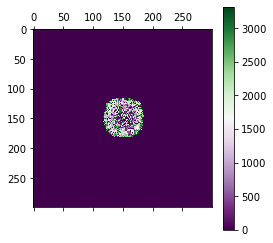

In [99]:
# Plot the tumour as a 2D map color coding the mutation ID
cmap = pyplot.cm.get_cmap('PRGn', mtx.max()+1)

pyplot.matshow(mtx, cmap=cmap)
pyplot.colorbar()

## For comparison, run the second stage without changed parameters.

In [77]:
cancer_sim = casim.load_cancer_simulation('out/cancer_1/cancer_sim.py.dill')

In [78]:
cancer_sim.parameters.number_of_generations = 20

In [79]:
cancer_sim.parameters.__dict__

{'_CancerSimulatorParameters__matrix_size': 300,
 '_CancerSimulatorParameters__number_of_generations': 20,
 '_CancerSimulatorParameters__division_probability': 1.0,
 '_CancerSimulatorParameters__adv_mutant_division_probability': 0.5,
 '_CancerSimulatorParameters__death_probability': 0.1,
 '_CancerSimulatorParameters__adv_mutant_death_probability': 0.0,
 '_CancerSimulatorParameters__mutation_probability': 0.2,
 '_CancerSimulatorParameters__adv_mutant_mutation_probability': 0.8,
 '_CancerSimulatorParameters__number_of_mutations_per_division': 10,
 '_CancerSimulatorParameters__adv_mutation_wait_time': 3,
 '_CancerSimulatorParameters__number_of_initial_mutations': 2,
 '_CancerSimulatorParameters__tumour_multiplicity': 'single',
 '_CancerSimulatorParameters__read_depth': 100,
 '_CancerSimulatorParameters__sampling_fraction': 0.1,
 '_CancerSimulatorParameters__plot_tumour_growth': True,
 '_CancerSimulatorParameters__export_tumour': True}

In [80]:
cancer_sim.run()

2020-08-14 08:49:16,010 INFO: Ready to start CancerSim run with these parameters:
2020-08-14 08:49:16,013 INFO: matrix_size = 300
2020-08-14 08:49:16,014 INFO: number_of_generations = 20
2020-08-14 08:49:16,016 INFO: division_probability = 1.0
2020-08-14 08:49:16,017 INFO: adv_mutant_division_probability = 0.5
2020-08-14 08:49:16,018 INFO: death_probability = 0.1
2020-08-14 08:49:16,020 INFO: adv_mutant_death_probability = 0.0
2020-08-14 08:49:16,021 INFO: mutation_probability = 0.2
2020-08-14 08:49:16,022 INFO: adv_mutant_mutation_probability = 0.8
2020-08-14 08:49:16,023 INFO: number_of_mutations_per_division = 10
2020-08-14 08:49:16,025 INFO: adv_mutation_wait_time = 3
2020-08-14 08:49:16,026 INFO: number_of_initial_mutations = 2
2020-08-14 08:49:16,027 INFO: tumour_multiplicity = single
2020-08-14 08:49:16,028 INFO: read_depth = 100
2020-08-14 08:49:16,030 INFO: sampling_fraction = 0.1
2020-08-14 08:49:16,031 INFO: plot_tumour_growth = True
2020-08-14 08:49:16,032 INFO: export_tumo

0

## Output

out/cancer_1/simOutput/growthCurve.pdf


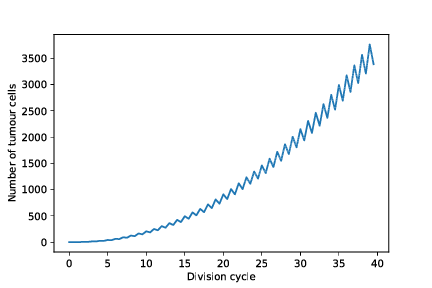

out/cancer_1/simOutput/sampleHistogram_130_178.pdf


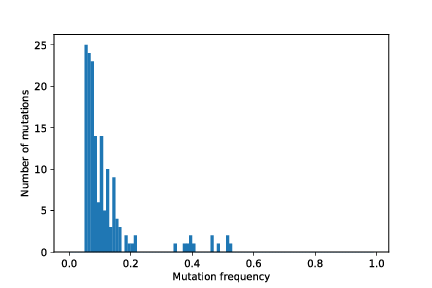

out/cancer_1/simOutput/sampleHistogram_150_155.pdf


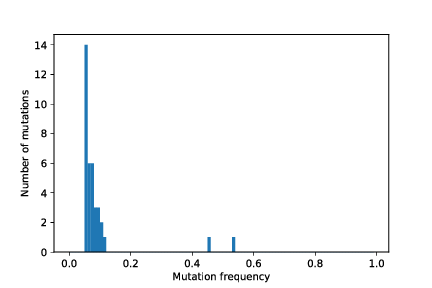

out/cancer_1/simOutput/wholeTumourVAFHistogram.pdf


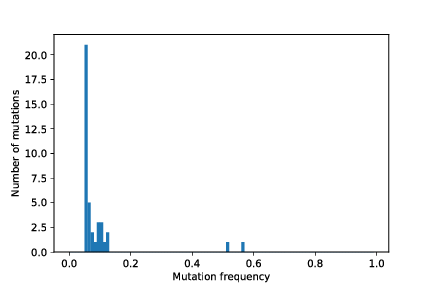

out/cancer_1/simOutput/sampleHistogram_132_136.pdf


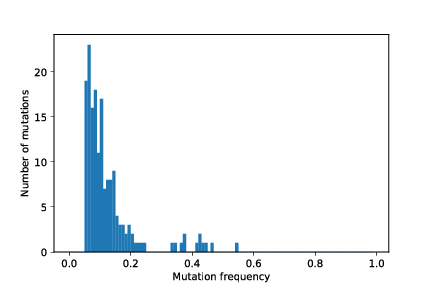

In [81]:
for pdf in glob(os.path.join(image_path,"*.pdf")):
    print(pdf)
    display(WImage(filename=pdf))

In [82]:
# Load the mutation matrix
mtx=unpickle('mtx.p').toarray()

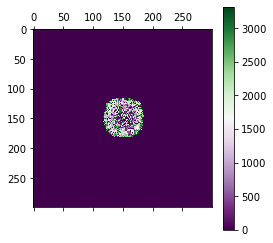

In [83]:
# Plot the tumour as a 2D map color coding the mutation ID
cmap = pyplot.cm.get_cmap('PRGn', mtx.max()+1)

pyplot.matshow(mtx, cmap=cmap)
pyplot.colorbar()